# Diagnose data for cleaning

Common data problems

- Incosistent column names
- Missing data
- Outliers
- Duplicate rows
- Untidy
- ....


We can visually inspect our data using Pandas.
df.head()/df.tail() will return the top/bottom rows.
df.columns will return the name of all columns in our data frame.
df.shape will return the number of rows/columns
df.info() returns more information




In [2]:
import pandas as pd
df = pd.read_csv('winequality-red.csv', sep = ';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
df.shape

(1599, 12)

In [5]:
df.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
5               7.4             0.660         0.00             1.8      0.075   
6               7.9             0.600         0.06             1.6      0.069   
7               7.3             0.650         0.00             1.2      0.065   
8               7.8             0.580         0.02             2.0      0.073   
9               7.5             0.500         0.36             6.1      0.071   
10              6.7             0.580         0.08             1.8      0.097

In [6]:
df.quality.value_counts(dropna=False)

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

### Summary Statistics: 

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Visual Exploratory

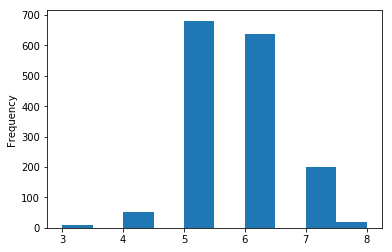

In [9]:
import matplotlib.pyplot as plt

df.quality.plot('hist')
plt.show()

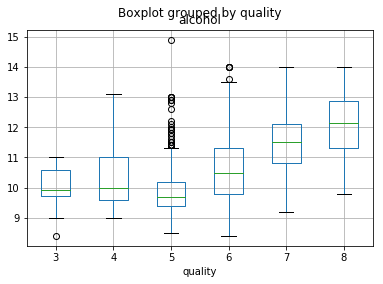

In [10]:
df.boxplot(column='alcohol', by='quality' )
plt.show()

## Tidy Data

The "Tidy Data" paper by Hadley Wickham formalizes the way we describe the shape of data and gives us a goal when formatting our data.
It's the "standard way to organize data values within a dataset".

### Principles of tidy data

- Columns represent separate variables
- Rows represent individual observations
- Each type of observational unit forms a table.

#### Melting

Turn columns into rows. It's the equivalent of an unpivot on sql server

In [15]:
import pandas as pd

df = pd.read_excel('tidy.xlsx')
df

,name,treatment a,treatment b
0,Daniel,NaN,42
1,John,12.0,31
2,Jane,24.0,27


In [16]:
pd.melt(frame=df, id_vars='name', value_vars=['treatment a', 'treatment b'])

,name,variable,value
0,Daniel,treatment a,NaN
1,John,treatment a,12.0
2,Jane,treatment a,24.0
3,Daniel,treatment b,42.0
4,John,treatment b,31.0
5,Jane,treatment b,27.0


#### Pivot

The opposite of the melting. Turn unique values into separate columns.

In [18]:
import pandas as pd
df = pd.read_excel('pivot.xlsx')

df

,date,element,value
0,2010-01-30,tmax,27.8
1,2010-01-30,tmin,14.5
2,2010-02-02,tmax,27.3
3,2010-02-02,tmin,14.4


In [19]:
df_tidy = df.pivot(index='date', columns='element', values='value')
df_tidy

element,tmax,tmin
date,,
2010-01-30,27.8,14.5
2010-02-02,27.3,14.4


Pivot does not if we have duplicated keys:

In [20]:
import pandas as pd
df = pd.read_excel('pivot2.xlsx')
df.pivot(index='date', columns='element', values='value')

ValueError: Index contains duplicate entries, cannot reshape

In those cases we have to use the Pivot Table method and chose an aggregation function for duplicate records

In [23]:
import numpy as np
df.pivot_table(values='value', index='date', columns='element', aggfunc=np.mean)


element,tmax,tmin
date,,
2010-01-30,27.8,14.5
2010-02-02,27.3,14.2


## Combining Data

We can concatenate dataframes using the pandas function **pd.concact**
When we concatenate two dataframes, the index is kept unchanged. So we now have two rows with the index 0.
We can pass the parameter **ignore_index=True** to the contact function to avoid this. 
By default the concat will concatenate row-wise. If you specify the axis=1 parameter it will attach columns. 

In [ ]:
pd.concatenate([df1, df2])

What if you have to load and concatenate hundreds of dataframes?
In those cases we can use Globbing to load all files. 
We can use pattern matching for file names.
This will return a list of strings. We can then use a loop to load and append the data.

In [2]:
import glob

notebooks = glob.glob('*.ipynb')
print(notebooks)


['1 - Intro to Python for Data Science.ipynb', '2 - Intermediate Python for Data Science.ipynb', '3 - Data Science Toolbox - Part 1.ipynb', '4 - Data Science Toolbox - Part 2.ipynb', '5 - Importing Data in Python - Part 1.ipynb', '6 - Importing Data in Python - Part 2.ipynb', '7 - Diagnose data for cleaning.ipynb']


## Merge Data

Pandas allows us to "JOIN" different dataframes.

In [ ]:
pd.merge(left=df_left, right=df_right, on=None, left_on='column', right_on='column')
#If the column names are the same on both sides you only have to specify the On parameter. If not, you have to use the left_on and right_on parameters

## Converting Data

We can convert data types in a data frame using the .astype() funciton of a dataframe

In [ ]:
df['treatment b'] = df['treatment b'].astype(str)
df['sex'] = df['sex'].astype('category')

Converting categorical data to category data type can make the dataframe smaller in memory  

## Cleaning bad data

When converting the data we can specify what to do with bad data. If we choose to coerce any row that cannot be converted to the data type you want, will become a NaN.

In [ ]:
tips['total_bill'] = pd.to_numeric(tips['total_bill'], errors='coerce')


Much of data cleaning involves string manipulation. 
We can clean strings by using regular expressions.
We use the **re** package to work with regular expressions.

In [3]:
# Import the regular expression module
import re

# Compile the pattern: prog
prog = re.compile('\d{3}-\d{3}-\d{4}')

# See if the pattern matches
result = prog.match('123-456-7890')
print(bool(result))


True
